# Ford GoBike Data
## (April 2019)
### by Wael Samoil

## Preliminary Wrangling


In [1]:
# import all packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
# load in the Ford GoBike dataset into a pandas dataframe
df = pd.read_csv('201904-fordgobike-tripdata.csv')
#explore the data
print(df.shape)
print(df.info())


(239111, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239111 entries, 0 to 239110
Data columns (total 14 columns):
duration_sec               239111 non-null int64
start_time                 239111 non-null object
end_time                   239111 non-null object
start_station_id           239047 non-null float64
start_station_name         239047 non-null object
start_station_latitude     239111 non-null float64
start_station_longitude    239111 non-null float64
end_station_id             239047 non-null float64
end_station_name           239047 non-null object
end_station_latitude       239111 non-null float64
end_station_longitude      239111 non-null float64
bike_id                    239111 non-null int64
user_type                  239111 non-null object
bike_share_for_all_trip    239111 non-null object
dtypes: float64(6), int64(2), object(6)
memory usage: 25.5+ MB
None


In [3]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip
0,50305,2019-04-30 22:33:55.1550,2019-05-01 12:32:20.4540,368.0,Myrtle St at Polk St,37.785434,-122.419622,324.0,Union Square (Powell St at Post St),37.788300,-122.408531,2749,Subscriber,No
1,53725,2019-04-30 20:43:41.6320,2019-05-01 11:39:06.9170,246.0,Berkeley Civic Center,37.869060,-122.270556,241.0,Ashby BART Station,37.852477,-122.270213,2608,Customer,No
2,78072,2019-04-30 10:32:46.4890,2019-05-01 08:13:58.9750,64.0,5th St at Brannan St,37.776754,-122.399018,64.0,5th St at Brannan St,37.776754,-122.399018,258,Subscriber,No
3,78969,2019-04-30 10:00:51.5500,2019-05-01 07:57:01.2620,67.0,San Francisco Caltrain Station 2 (Townsend St...,37.776639,-122.395526,89.0,Division St at Potrero Ave,37.769218,-122.407646,1974,Subscriber,No
4,1128,2019-04-30 23:59:04.7390,2019-05-01 00:17:53.0910,124.0,19th St at Florida St,37.760447,-122.410807,5.0,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,877,Subscriber,No


In [4]:
#convert the 2 features to DateTime type to use these 2 feture in future data exploration
df.start_time = pd.to_datetime(df.start_time)
df.end_time = pd.to_datetime(df.end_time)

In [5]:
#Missing data
print(df.isnull().sum())

duration_sec                0
start_time                  0
end_time                    0
start_station_id           64
start_station_name         64
start_station_latitude      0
start_station_longitude     0
end_station_id             64
end_station_name           64
end_station_latitude        0
end_station_longitude       0
bike_id                     0
user_type                   0
bike_share_for_all_trip     0
dtype: int64


In [6]:
# % of rows that have at least one missing data
100-100*(df.dropna().shape[0])/len(df)

0.0267658116941476

In [7]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239111 entries, 0 to 239110
Data columns (total 14 columns):
duration_sec               239111 non-null int64
start_time                 239111 non-null datetime64[ns]
end_time                   239111 non-null datetime64[ns]
start_station_id           239047 non-null float64
start_station_name         239047 non-null object
start_station_latitude     239111 non-null float64
start_station_longitude    239111 non-null float64
end_station_id             239047 non-null float64
end_station_name           239047 non-null object
end_station_latitude       239111 non-null float64
end_station_longitude      239111 non-null float64
bike_id                    239111 non-null int64
user_type                  239111 non-null object
bike_share_for_all_trip    239111 non-null object
dtypes: datetime64[ns](2), float64(6), int64(2), object(4)
memory usage: 25.5+ MB
None


In [8]:
print(df.user_type.unique())

['Subscriber' 'Customer']


### What is the structure of your dataset?

> The GoFord dataset contains 14  feature and 239111 observation. less than 1% of data have at least one missing value.it affect my analysis of the data so i will not drop any row of this data.

> Data Features:
- Trip Duration (seconds)
- Start Time and Date
- End Time and Date
- Start Station ID
- Start Station Name
- Start Station Latitude
- Start Station Longitude
- End Station ID
- End Station Name
- End Station Latitude
- End Station Longitude
- Bike ID
- User Type (Subscriber or Customer – “Subscriber” = Member or “Customer” = Casual)      

### What is/are the main feature(s) of interest in your dataset?

    > The main features that interest me are the number of trips and the relation of the number of trips and other features. 
    another feature that interests me is the trip duration and relation of the time and other features.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> Featres are:
- Trip Duration (seconds)
- Start Time and Date
- End Time and Date
- User Type


## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

In [9]:
#Duration in SEC statistics
df.duration_sec.describe()

count    239111.000000
mean        802.671199
std        1990.006091
min          61.000000
25%         349.000000
50%         558.000000
75%         876.000000
max       86114.000000
Name: duration_sec, dtype: float64

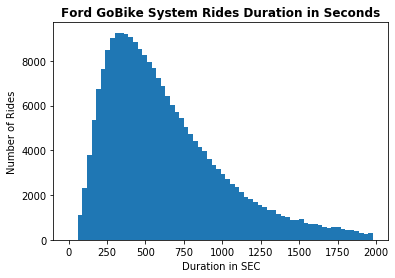

In [10]:
# Trip duration in seconds distribution
bin_edges = np.arange(0, 2000, 30)

plt.hist(data = df, x = 'duration_sec', bins = bin_edges);

plt.title("Ford GoBike System Rides Duration in Seconds",fontweight='bold')
plt.xlabel('Duration in SEC')
plt.ylabel('Number of Rides');

> The rides duration usualy between 200 Sec and 750 Sec which means 3.3 Min and 12.5 Min

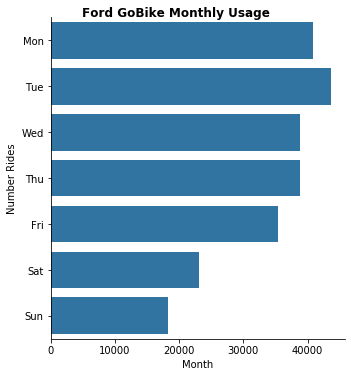

In [11]:
#relation between week days and number of trips
weekday = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri','Sat','Sun']
df['start_time_day'] = df['start_time'].dt.strftime('%a')
day_chart = sb.catplot(data = df, y ='start_time_day', kind = 'count', color = sb.color_palette()[0],order = weekday,aspect = 1);

day_chart.set_axis_labels('Month', 'Number Rides'),

day_chart.fig.suptitle('Ford GoBike Monthly Usage',y = 1, fontweight='bold');

> From the above plot, I conclude that the mainstream usage in working days. It seems that users use a bike to go to work.

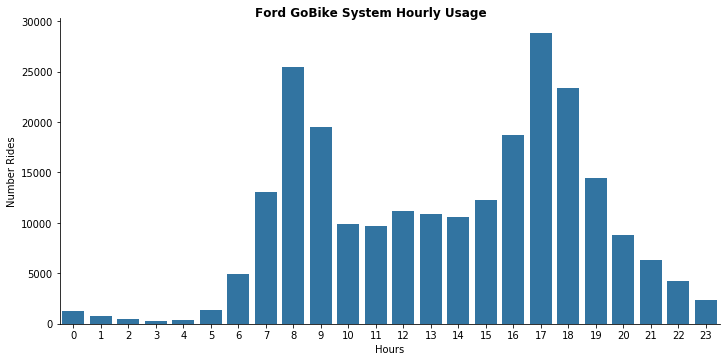

In [12]:
#relation between day hours and number of trips
df['start_time_hour'] = df['start_time'].dt.hour
hour_chart = sb.catplot(data = df, x='start_time_hour', kind='count', color = sb.color_palette()[0], aspect = 2)

hour_chart.set_axis_labels('Hours', 'Number Rides')

hour_chart.fig.suptitle('Ford GoBike System Hourly Usage',y = 1, fontweight='bold');

> The above plot proved my hypothesis, the users use Ford GoBike as transportation to go to work and return from work to home

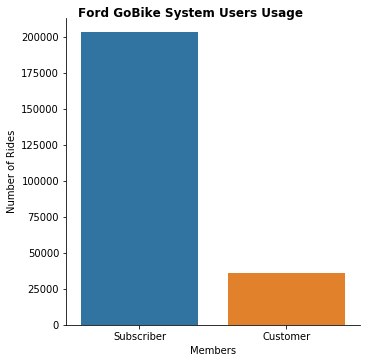

In [13]:
#relation between users type and number of trips
user_chart = sb.catplot(data = df, x='user_type', kind='count',  aspect = 1)

user_chart.set_axis_labels('Members', 'Number of Rides')

user_chart.fig.suptitle('Ford GoBike System Users Usage',y=1, fontweight='bold');


> It seems that subscribers use GoBike way more than customers.so, Ford GoBike should get more subscribers to get more number of rides.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The distributions seem normally, the usage of bikes increases in working days and decreases on weekends. also, the time of the number of users is increasing in the morning during going to work and afternoon during back home.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> So far the data has usual distribution.
> I Converted the time fields from object to DateTime to be able to deal with it.

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

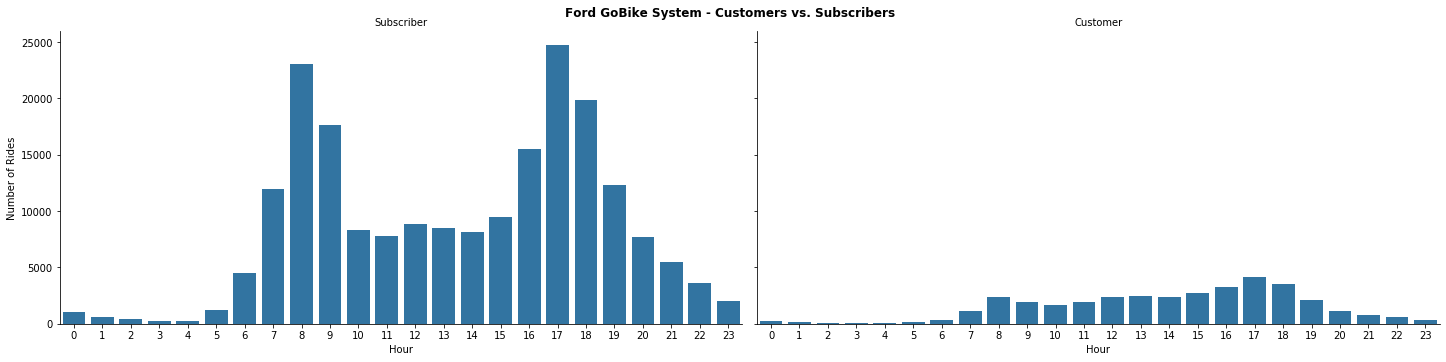

In [14]:
#relation between day hours and number of trips and user type
user_type_chart = sb.catplot(data=df, x='start_time_hour', col="user_type", kind='count', color = sb.color_palette()[0], aspect = 2);

user_type_chart.set_axis_labels("Hour", "Number of Rides");
user_type_chart.set_titles("{col_name}");

user_type_chart.fig.suptitle('Ford GoBike System - Customers vs. Subscribers', y=1,  fontweight='bold');


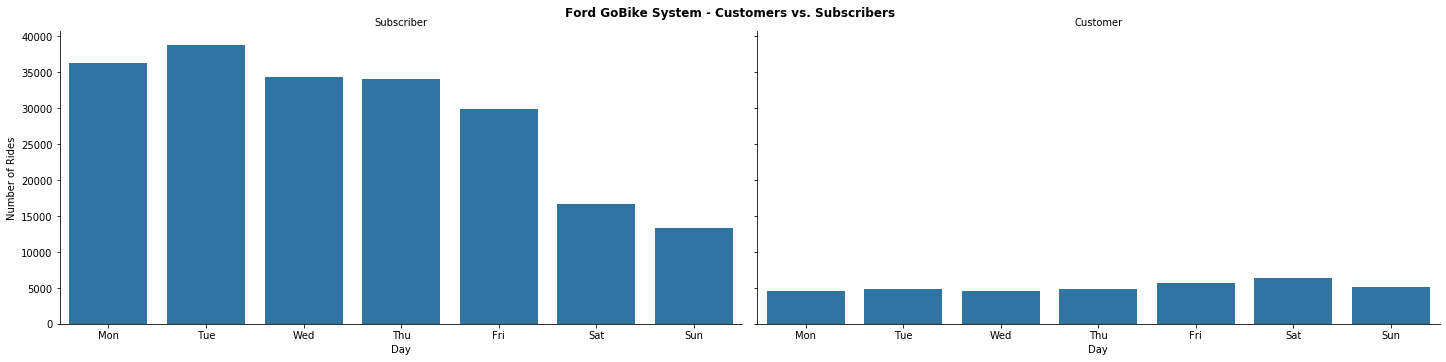

In [15]:
#relation between week days and number of trips and user type
user_type_chart = sb.catplot(data=df, x='start_time_day', col="user_type", kind='count', color = sb.color_palette()[0], aspect = 2, order=weekday);

user_type_chart.set_axis_labels("Day", "Number of Rides");
user_type_chart.set_titles("{col_name}");

user_type_chart.fig.suptitle('Ford GoBike System - Customers vs. Subscribers', y=1, fontweight='bold');

>From the above 2 plots, I can say that the users who subscribe use bikes mainly for going to work and return from work. But users who don't subscribe(Customer) use bike for a casual walk during the day

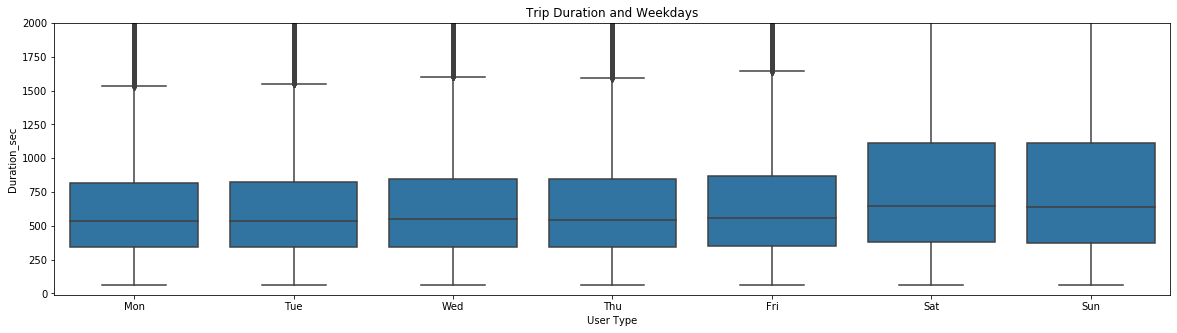

In [16]:
plt.figure(figsize = [20, 5])
sb.boxplot(data = df, x = 'start_time_day', y = 'duration_sec', color = sb.color_palette()[0],order=weekday)
plt.ylim([-10, 2000])
plt.title('Trip Duration and Weekdays')
plt.xlabel('User Type')
plt.ylabel('Duration_sec')
plt.show()

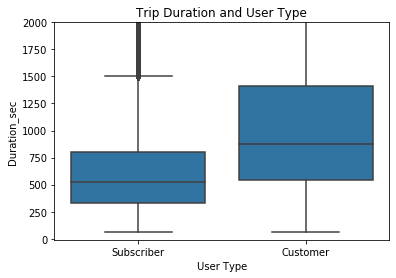

In [17]:
sb.boxplot(data = df, x = 'user_type', y = 'duration_sec', color = sb.color_palette()[0])
plt.ylim([-10, 2000])
plt.title('Trip Duration and User Type')
plt.xlabel('User Type')
plt.ylabel('Duration_sec')
plt.show()

> The 2 above plots prove that the customers use the bike for a casual walk so they take more time with bikes. 
Subscribers use bikes to go to work. so, they don't take time with bikes.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> The above plots prove that the casual walk with bike time is more than the time subscribers take to go to work

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> The other features are about station id and locations, for me, it is not an interesting thing in these columns

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

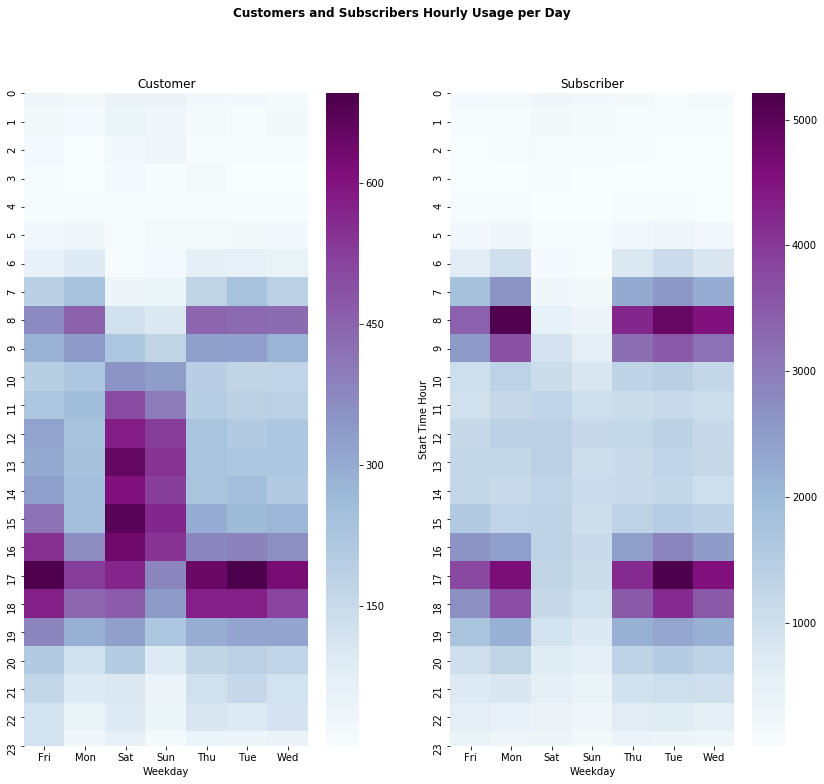

In [19]:
# Heatmap for customers and subscribers Hourly usage per day'
plt.figure(figsize=(14,12))
plt.suptitle('Customers and Subscribers Hourly Usage per Day',fontweight='bold')

# subscribers
plt.subplot(1, 2, 2)
subscriber = df.query('user_type == "Subscriber"').groupby(["start_time_hour", "start_time_day"])["bike_id"].size().reset_index()
subscriber = subscriber.pivot("start_time_hour", "start_time_day", "bike_id")
sb.heatmap(subscriber, cmap="BuPu")

plt.title("Subscriber", y=1)
plt.xlabel('Weekday')
plt.ylabel('Start Time Hour')

# customers
plt.subplot(1, 2, 1)
customer = df.query('user_type == "Customer"').groupby(["start_time_hour", "start_time_day"])["bike_id"].size().reset_index()
customer = customer.pivot("start_time_hour", "start_time_day", "bike_id")
sb.heatmap(customer, cmap="BuPu")

plt.title("Customer", y=1)
plt.xlabel('Weekday')
plt.ylabel('');



### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> My analysis focuses on relations between (user type, number of trips, and duration), I found a big relation between the number of trips and user type which is the subscribers usually bikes in going to work, the heat above maps illustrates the time of using biked for subscribers in morning and afternoon. Customers usually use bikes for casual walks.
Also, the relation between user type and duration it from the plots above it seems customers take more time with the bike in their casual walk than subscribers in using a bike for going to work

### Were there any interesting or surprising interactions between features?

> The big relation between the number of trips and weekdays and user type which illustrates that the number of trips is more in working days because subscriber use the bike to go to work